In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from island_model import WorldModel, Island, IslandCell

In [9]:
model = WorldModel(n_islands=12, land_fraction=0.15)

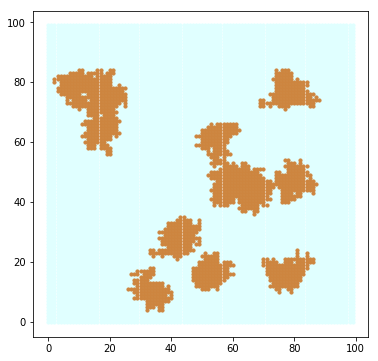

In [10]:
sea_coords = []
land_coords = []
port_coords = []
for contents, x, y in model.grid.coord_iter():
    if contents["Land"] is None:
        sea_coords.append((x, y))
    else:
        land_coords.append((x, y))
        if len(contents["Ships"]) > 0:
            port_coords.append((x, y))

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(*zip(*sea_coords), s=10, c='LightCyan')
ax.scatter(*zip(*land_coords), s=10, c='Peru')
#ax.scatter(*zip(*port_coords), s=12, c='Black')

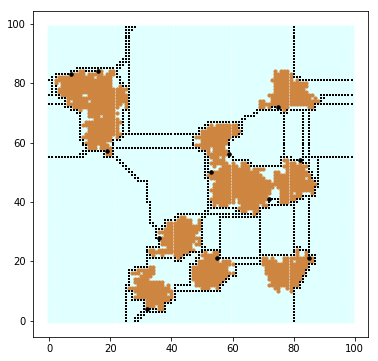

In [11]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(*zip(*sea_coords), s=10, c='LightCyan')
ax.scatter(*zip(*land_coords), s=10, c='Peru')
ax.scatter(*zip(*port_coords), s=12, c='Black')

for path in model.sea_lanes.values():
    ax.scatter(*zip(*path), s=5, marker="+", c='k')

Run for some amount of time, then collect temperature and humidity information

In [6]:
for t in range(100):
    model.step()

0: Raylee departed Wallisburnslergatert for Chell
0: Court departed Darsteridmouge for Chell
0: Wins departed Wallisburnslergatert for Haver-Lyningh
0: Caitlyn departed Beverts for Car
0: Leaden departed Haver-Lyningh for Spatfordburn
0: Spen departed Wallisburnslergatert for Hadcay
0: Holles departed Darsteridmouge for Newenridlomyart
0: Finsler departed Darsteridmouge for Newenridlomyart
0: Cam departed Spatfordburn for Haver-Lyningh
0: Meganney departed Hebury for Chell
0: Brachifnabley departed Darsteridmouge for Newenridlomyart
0: Sabrison departed Yeoves for Hebury
0: Mckson departed Wallisburnslergatert for Spatfordburn
0: Brona departed Wallisburnslergatert for Hadcay
0: Aritly departed Car for Wallisburnslergatert
0: Mck departed Hebury for Yeoves
0: News departed Car for Newenridlomyart
0: Anda departed Beverts for Newenridlomyart
0: Jesustor departed Newenridlomyart for Chell
0: Rye departed Wallisburnslergatert for Car
0: Caillan departed Spatfordburn for Hadcay
1: Aid depa

61: Wisting Carridle-Fury arrived at Hebury.
61: Finsler departed Newenridlomyart for Yeoves
61: Sand arrived at Hadcay.
61: Nevorgel arrived at Newenridlomyart.
62: Easidge arrived at Wallisburnslergatert.
62: Mck arrived at Wallisburnslergatert.
62: Brachifnabley departed Newenridlomyart for Wallisburnslergatert
63: Shington-Wold arrived at Hebury.
63: Cham arrived at Wallisburnslergatert.
63: Sand departed Hadcay for Spatfordburn
63: Weltry arrived at Hadcay.
63: Brand arrived at Hebury.
64: Chals arrived at Hadcay.
64: News departed Newenridlomyart for Chell
64: Hoverpellseybridge arrived at Hadcay.
65: Savin arrived at Beverts.
65: Cham departed Wallisburnslergatert for Hebury
65: Hophel arrived at Hebury.
65: All arrived at Yeoves.
65: Royall Strourn arrived at Beverts.
66: Easidge departed Wallisburnslergatert for Hadcay
66: Sough arrived at Hebury.
66: Shington-Wold departed Hebury for Yeoves
66: Hophel departed Hebury for Darsteridmouge
67: Royall Strourn departed Beverts for 

In [9]:
ship = model.schedule.agents[1]
ship.name

'Weld'

In [10]:
for entry in ship.log:
    print(entry)

Day 0
	At port at Hebury

Day 1
	At port at Hebury

Weld departed Hebury for Spatfordburn
Day 2
	Wind: -0.05 by 0.18
	 Temperature: 0.7

Day 3
	Wind: 0.14 by 0.04
	 Temperature: 0.7

Day 4
	Wind: 0.20 by 0.02
	 Temperature: 0.7

Day 5
	Cloudy
	Wind: 0.33 by -0.17
	 Temperature: 0.7

Day 6
	Cloudy
	Wind: 0.29 by -0.13
	 Temperature: 0.7

Day 7
	Cloudy
	Wind: 0.43 by -0.59
	 Temperature: 0.7

Day 8
	Cloudy
	Wind: 0.41 by -0.69
	 Temperature: 0.7

Day 9
	Raining
	Wind: 0.30 by -1.12
	 Temperature: 0.7

Day 10
	Wind: 0.37 by -0.78
	 Temperature: 0.7

Day 11
	Cloudy
	Wind: 0.30 by -0.40
	 Temperature: 0.7

Day 12
	Cloudy
	Wind: 0.23 by -0.28
	 Temperature: 0.7

Day 13
	Cloudy
	Wind: 0.10 by -0.12
	 Temperature: 0.8

Day 14
	Cloudy
	Wind: -0.39 by 0.21
	 Temperature: 0.8

Day 15
	Cloudy
	Wind: 0.12 by -0.23
	 Temperature: 0.8

Day 16
	Cloudy
	Wind: -0.10 by -0.00
	 Temperature: 0.8

Day 17
	Cloudy
	Wind: -0.41 by 0.16
	 Temperature: 0.8

Day 18
	Cloudy
	Wind: -1.48 by -0.06
	 Temperature: 0.

In [11]:
temp_map = np.zeros((100, 100))
humidity_map = np.zeros_like(temp_map)
cloud_map = np.zeros_like(temp_map)
rain_map = np.zeros_like(temp_map)

for x in range(100):
    for y in range(100):
        cell = model.grid[x][y]["Weather"]
        temp_map[x,y] = cell.temperature
        humidity_map[x,y] = cell.humidity
        if cell.cloudy:
            cloud_map[x,y] = 1
        if cell.raining:
            rain_map[x,y] = 1

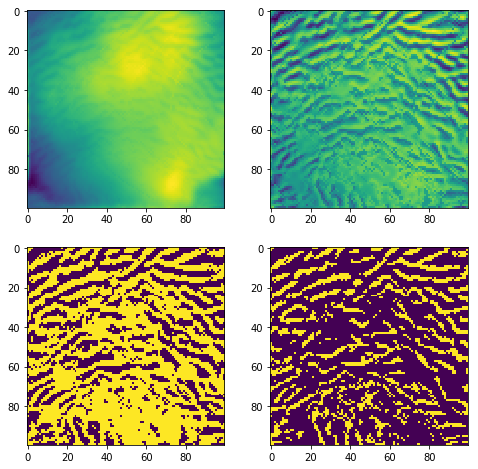

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes[0,0].imshow(temp_map)
axes[0,1].imshow(humidity_map)
axes[1,0].imshow(cloud_map)
axes[1,1].imshow(rain_map)

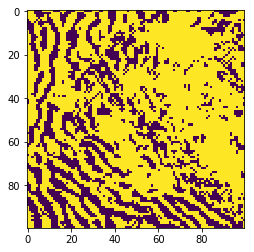

In [31]:
notional_clouds = np.zeros_like(humidity_map)
for x in range(100):
    for y in range(100):
        cell = model.grid[x][y]["Weather"]
        if cell.humidity > 0.6 + 0.3*cell.temperature:
            notional_clouds[x,y] = 1
plt.imshow(notional_clouds)

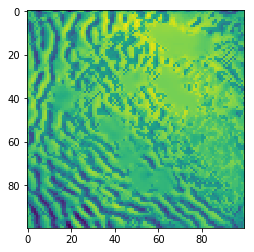

In [8]:
plt.imshow(humidity_map)

(array([ 147.,  233.,  345.,  812., 1579., 2919., 1559.,  967.,  881.,
         558.]),
 array([0.0703557 , 0.12030308, 0.17025045, 0.22019783, 0.27014521,
        0.32009259, 0.37003997, 0.41998735, 0.46993472, 0.5198821 ,
        0.56982948]),
 <a list of 10 Patch objects>)

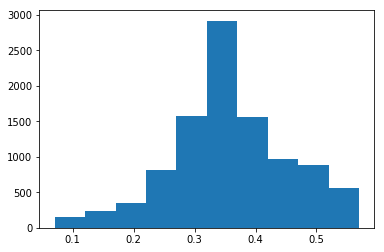

In [9]:
plt.hist(temp_map.flatten())

(array([  22.,   82.,  269.,  468.,  816., 1388., 2281., 2940., 1603.,
         131.]),
 array([0.35770653, 0.41406294, 0.47041934, 0.52677575, 0.58313216,
        0.63948857, 0.69584498, 0.75220139, 0.8085578 , 0.86491421,
        0.92127062]),
 <a list of 10 Patch objects>)

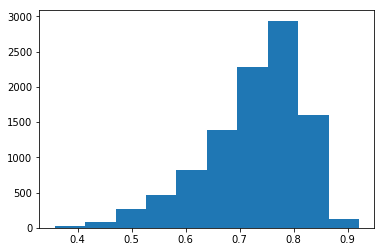

In [10]:
plt.hist(humidity_map.flatten())

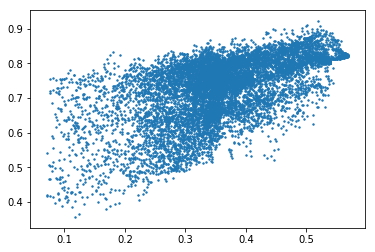

In [12]:
plt.scatter(temp_map.flatten(), humidity_map.flatten(), s=2)

### View names

In [7]:
model.ports

{'Ofojpeejiv': <island_model.Port at 0x29861776cc0>,
 'Ym Aquhob': <island_model.Port at 0x29861776d30>,
 'Afma': <island_model.Port at 0x29861776d68>,
 'Etabowi': <island_model.Port at 0x29861776dd8>,
 'Ican': <island_model.Port at 0x29861776e48>,
 'Tyayle': <island_model.Port at 0x29861776eb8>,
 'Ym Evpesy': <island_model.Port at 0x29861776f28>,
 'Xejam': <island_model.Port at 0x29861776ef0>,
 'Limywu': <island_model.Port at 0x29861776fd0>,
 'Okay': <island_model.Port at 0x29861779080>,
 'Ayivym': <island_model.Port at 0x298617790f0>,
 'Ayue': <island_model.Port at 0x29861779160>}

In [8]:
for agent in model.schedule.agents:
    if agent.layer == "Ships":
        print(agent.name)

Mercy Mercy
Limywu Senator
Ayivym Glory
Courage Pride
Prince of Ym Evpesy
Duke of Etabowi
Princess of Ayivym
Ican Mercy
Duke of Xejam
Glory Courage
Pride of Xejam
Ayivym Charity
Duchess of Ayivym
Cunning Kindness
Glory of Ym Evpesy
Glory Glory
Prince of Okay
Pride Charity
Duchess's Cunning
Okay Senator
Afma Elector
Ym Evpesy Prince
Tyayle Pride
Princess's Pride
Prince's Courage
Xejam Wisdom
Charity Mercy
Ayivym Prince
Senator's Wisdom
Kindness Love
Love Love
Ican Charity
Glory of Etabowi
Tyayle Senator
Charity of Afma
Courage of Okay
Elector's Mercy
Duke of Ym Evpesy
Ayivym Duchess
Wisdom Mercy
Prince's Cunning
Duchess of Ym Aquhob
Xejam Glory
Duchess of Limywu
Ican Prince
Prince of Ym Aquhob
Pride Courage
Ican Duke
Courage of Ayue
Mercy of Tyayle
Ayue Elector
Prince's Kindness
Exilarch's Courage
Exilarch of Xejam
Ican President
Ican Wisdom
Duchess's Charity
Exilarch's Wisdom
Ofojpeejiv Elector
Pride of Ayivym
Courage of Limywu
Elector's Cunning
Ayivym President
Princess's Kindness
Tya

In [8]:
model.step()

# Doing some naming

In [24]:
import random

In [1]:
from utils import make_weighted_syllables, make_word, weighted_random, make_place_name_model

In [2]:
syllables = make_weighted_syllables()

In [3]:
make_place_name = make_place_name_model(syllables, 2, 0.3, {2: 1, 3: 3, 4: 1, 5: 0.5})

In [4]:
for _ in range(50):
    print(make_place_name())

Eqo
Ve Oiu
Py Giryi
Akezo
Miym
Ciogo
Yhxyyqaxac
Ve Eerygu
Py Imiww
Ve Upzeli
Ve Lede
Odvidyp
Usi
Giyzde
Unpaoz
Ige
Uwdou
Unjew
Ve Houjoy
Yjokd
Iafepyu
Yfazeaabp
Eed
Iyadh
Ible
Py Ayazx
Ahqero
Payoup
Ullymu
Notus
Ve Yziuladea
Py Yneye
Abfopyo
Py Ocyao
Py Aquifaotf
Ve Miiolu
Vozaapi
Py Eddep
Ve Ehpoyogo
Nasyfuetok
Veegjoc
Jaetuxqy
Sayn
Yquai
Emohu
Neykk
Iiyvyb
Eyhyz
Aaaygo
Uzsiboo


In [9]:
month_suffix = weighted_random(syllables)
for i in range(12):
    print(make_word(syllables, 1) + month_suffix)

Exyn
Qyyn
Yoyn
Teyn
Ehyn
Anyn
Ugyn
Yfyn
Ynyn
Deyn
Iqyn
Rayn
